Problem Statement:

Refer Mall Customer Segmentation Dataset. Apply appropriate EDA methods wherever required and perform feature engineering. Construct a model using K means clustering classifier and form appropriate clusters. Analyse the performance of model

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# creating a function which will give us features from the dataset
def data_feature(dataset):
    print("SHAPE OF THE DATA: ")
    print(dataset.shape)
    print("-"*90)
    print("INFORMATION OF THE DATA: ")
    print(dataset.info())
    print("-"*90)
    print("NUMBER OF NULL VALUES PRESENT IN THE DATA: ")
    print(dataset.isnull().sum())
    print("-"*90)
    print("COLUMN NAMES OF THE DATA: ")
    print(dataset.columns)
    print("-"*90)
data_feature(dataset)

SHAPE OF THE DATA: 
(200, 5)
------------------------------------------------------------------------------------------
INFORMATION OF THE DATA: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
------------------------------------------------------------------------------------------
NUMBER OF NULL VALUES PRESENT IN THE DATA: 
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
-------------------------------------------

# EDA

In [5]:
### Value counts of the column - Gender

gender_count = dataset['Gender'].value_counts(dropna = False)
gender_count

Female    112
Male       88
Name: Gender, dtype: int64

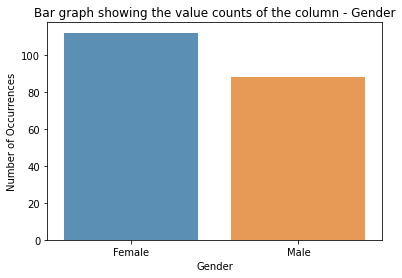

In [9]:
### Bar graph showing the value counts of the column - Gender

sns.barplot(gender_count.index, gender_count.values, alpha = 0.8)
plt.title('Bar graph showing the value counts of the column - Gender')
plt.ylabel('Number of Occurrences', fontsize = 10)
plt.xlabel('Gender', fontsize = 10)
plt.show()

From the above graph, we can see that most of the customers' of the mall are Female. Now let's see the average Annual Income for each Gender.

In [10]:
### Mean of Annual Income by Gender

gender_income = dataset[['Gender', 'Annual Income (k$)']].groupby('Gender', as_index = False).mean()
gender_income

,Gender,Annual Income (k$)
0,Female,59.250000
1,Male,62.227273


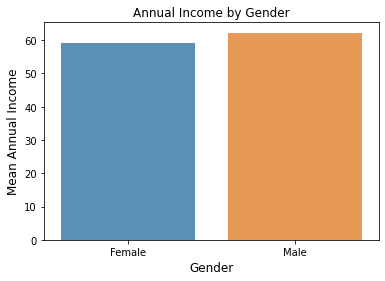

In [11]:
### Mean Annual Income by Gender

sns.barplot(gender_income['Gender'], gender_income['Annual Income (k$)'], alpha = 0.8)
plt.title('Annual Income by Gender')
plt.ylabel('Mean Annual Income', fontsize = 12)
plt.xlabel('Gender', fontsize = 12)
plt.show()

From the above graph, we can see that the average annual income is almost similar for both Male and Female.

In [12]:
### Mean Spending Score by Gender

gender_score = dataset[['Gender', 'Spending Score (1-100)']].groupby('Gender', as_index = False).mean()
gender_score

,Gender,Spending Score (1-100)
0,Female,51.526786
1,Male,48.511364


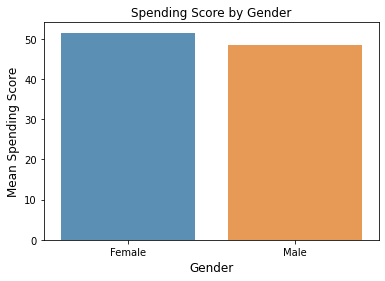

In [13]:
### Mean Spending Score by Gender

sns.barplot(gender_score['Gender'], gender_score['Spending Score (1-100)'], alpha = 0.8)
plt.title('Spending Score by Gender')
plt.ylabel('Mean Spending Score', fontsize = 12)
plt.xlabel('Gender', fontsize = 12)
plt.show()

From the above graph, we can see that the mean spending score is slightly higher in Female than Male.

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

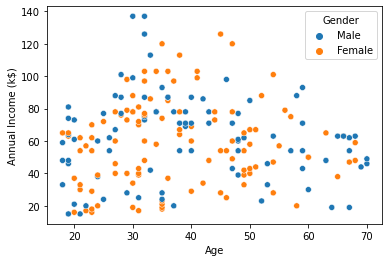

In [14]:
### Scatterplot between Age and Annual Income

sns.scatterplot(data = dataset, x = "Age", y = "Annual Income (k$)", hue = "Gender")

From the above graph, we can see that there is no significant relationship between Age and Annual Income (k$).

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

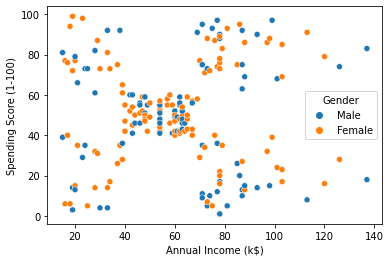

In [15]:
### Scatterplot between Annual Income and Spending Score

sns.scatterplot(data = dataset, x = "Annual Income (k$)", y = "Spending Score (1-100)", hue = "Gender")

From the above graph, we can see the formation of clusters in the data. We will take a look at it using K-Means clustering later in the notebook.

# Data Preprocessing

In [16]:
# Finding outliers

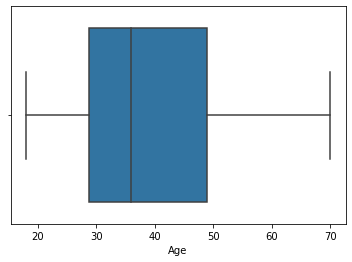

In [17]:
 ax = sns.boxplot(dataset["Age"])

From the above two visualizations, we conclude that the maximum customer ages are between 30 and 35. The minimum age of customers is 18, whereas, the maximum age is 70.

Text(0.5, 1.0, 'BoxPlot for Descriptive Analysis of Spending Score')

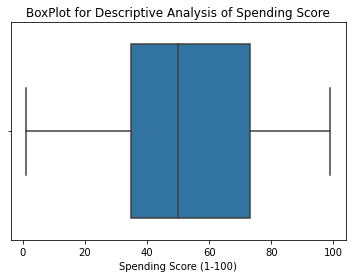

In [18]:
ax = sns.boxplot(dataset["Spending Score (1-100)"])
plt.title("BoxPlot for Descriptive Analysis of Spending Score")

# K-means Algorithm

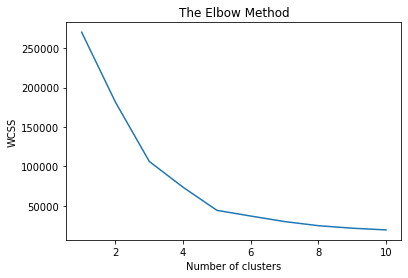

In [19]:
X =dataset.iloc[:,[3, 4]].values

# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter=300, n_init=10, random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From the above graph, we conclude that 4 is the appropriate number of clusters since it seems to be appearing at the bend in the elbow plot.

In [20]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter=300, n_init=10, random_state = 42)
y_kmeans = kmeans.fit_predict(X)

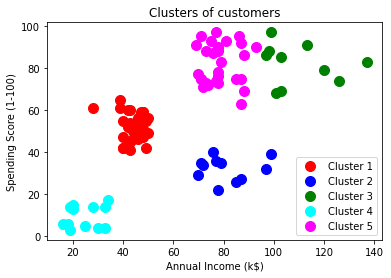

In [21]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label =  "Cluster 1")
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label =  "Cluster 2")
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label =  "Cluster 3")
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label =    "Cluster 4")
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = "Cluster 5")


plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

From the above clustering result we can learn:

- Cluster 1 customers are with midium Spending core and low annual income.
- Cluster 2 – This cluster represents customers having a midum anuale income and a low speding score.
- Cluster 3 – This cluster comprises of customers with a high annule income and a high spending score.
- Cluster 4 customers are with low Spending core and low annual income.
- Cluster 5 – In this cluster, there are customers with a medium PCA1 and a high spending score.